<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Superintelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
env = gym.make('CartPole-v0')

In [4]:
# env.seed()

In [4]:
action_size = env.action_space.n
action_size

2

In [5]:
[env.action_space.sample() for _ in range(10)]

[1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [6]:
state_size = env.observation_space.shape[0]
state_size

4

In [7]:
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

(array([-0.00466018,  0.02525681,  0.02726531, -0.02065049], dtype=float32),
 {})

In [8]:
state, reward, done, trunc, _ = env.step(env.action_space.sample())
state, reward, done, trunc, _

(array([-0.00415504,  0.21997735,  0.0268523 , -0.30460772], dtype=float32),
 1.0,
 False,
 False,
 {})

In [9]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()[0]
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, trunc, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = pd.concat((data, pd.DataFrame(results)))
        length.append(treward)

CPU times: user 3.15 s, sys: 159 ms, total: 3.31 s
Wall time: 3.21 s


In [10]:
np.array(length).mean()

123.55555555555556

In [11]:
np.array(length).sum()

1112.0

In [12]:
length

[124.0, 112.0, 124.0, 121.0, 119.0, 120.0, 149.0, 118.0, 125.0]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112 entries, 0 to 124
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      1112 non-null   float32
 1   s2      1112 non-null   float32
 2   s3      1112 non-null   float32
 3   s4      1112 non-null   float32
 4   a       1112 non-null   int64  
 5   r       1112 non-null   float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 43.4 KB


In [14]:
data.tail()

,s1,s2,s3,s4,a,r
120,-1.376495,1.197668,-0.005063,-1.550319,1,1.0
121,-1.352542,1.392850,-0.036069,-1.844577,1,1.0
122,-1.324685,1.588351,-0.072960,-2.148239,1,1.0
123,-1.292918,1.784111,-0.115925,-2.462530,1,1.0
124,-1.257236,1.980005,-0.165176,-2.788404,0,1.0


In [15]:
data

,s1,s2,s3,s4,a,r
0,0.032310,0.003603,0.026071,-0.024675,0,1.0
1,0.032382,-0.191883,0.025578,0.276118,1,1.0
2,0.028544,0.002865,0.031100,-0.008389,1,1.0
3,0.028602,0.197527,0.030932,-0.291100,0,1.0
4,0.032552,0.001978,0.025110,0.011176,0,1.0
...,...,...,...,...,...,...
120,-1.376495,1.197668,-0.005063,-1.550319,1,1.0
121,-1.352542,1.392850,-0.036069,-1.844577,1,1.0
122,-1.324685,1.588351,-0.072960,-2.148239,1,1.0
123,-1.292918,1.784111,-0.115925,-2.462530,1,1.0


In [16]:
np.array(length).cumsum()

array([ 124.,  236.,  360.,  481.,  600.,  720.,  869.,  987., 1112.])

In [17]:
length_cumsum = np.array(length).cumsum()
for i in range(len(length_cumsum)):
    print(data.iloc[[int(length_cumsum[i]) - 1]])
    print()


           s1        s2        s3        s4  a    r
123  0.070821 -1.326513  0.194775  1.256813  1  1.0

           s1        s2        s3        s4  a    r
111  0.205555 -0.239762  0.208052  1.120399  1  1.0

          s1        s2        s3        s4  a    r
123  1.71144  3.204606 -0.183331 -2.171364  0  1.0

           s1        s2        s3        s4  a    r
120 -0.585002  0.072177 -0.196754 -1.014122  1  1.0

           s1        s2        s3        s4  a    r
118  1.251378 -1.186903  0.199828  2.237591  0  1.0

           s1        s2        s3        s4  a    r
119 -1.103814 -1.263237 -0.191898 -0.996566  0  1.0

           s1        s2        s3       s4  a    r
148 -0.428889  0.061742 -0.191874 -1.23078  0  1.0

           s1        s2        s3        s4  a    r
117 -0.685014  0.259467 -0.200518 -1.842528  1  1.0

           s1        s2        s3        s4  a    r
124 -1.257236  1.980005 -0.165176 -2.788404  0  1.0



In [37]:
12*2*np.pi/360

0.20943951023931953

In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [19]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [20]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [17]:
# from tensorflow.python.framework.ops 
# # import (disable_eager_execution)
# disable_eager_execution()

In [21]:
from keras.layers import Dense
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [24]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

CPU times: user 961 ms, sys: 133 ms, total: 1.09 s
Wall time: 909 ms


In [25]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.635095,0.634421,0.673746,0.627803
23,0.634430,0.636670,0.679240,0.623318
24,0.634193,0.638920,0.678389,0.623318


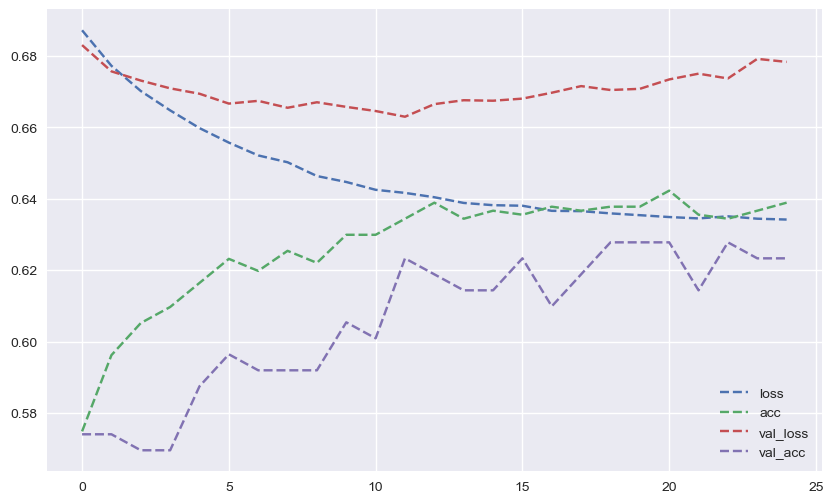

In [26]:
res.plot(figsize=(10, 6), style='--');

In [27]:
def epoch():
    print('|', end='')
    done = False
    state = env.reset()[0]
    trunc = False
    treward = 0
    while not done and not trunc:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, trunc, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [28]:
epoch()

1/1 [==============================] - 0s 9ms/step


200.0

In [62]:
%%time
res = np.array([epoch() for _ in range(100)])
print()
res

1/1 [==============================] - 0s 8ms/step

CPU times: user 7min 4s, sys: 33.5 s, total: 7min 37s
Wall time: 7min 14s


array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [29]:
res.mean()

loss        0.646645
acc         0.626817
val_loss    0.670603
val_acc     0.605919
dtype: float64

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>